#**🏆** Mini Challenge: Data Cleanup - Tweet Dataset (Darija)



📌 Challenge Description:

In this challenge, you will clean a tweet dataset from Hugging Face (`shmuhammad/AfriSenti-twitter-sentiment`), focusing on the Moroccan Darija subset. The goal is to preprocess the text data by removing emojis, usernames, and applying [texte du lien](https://)a custom list of Darija stop words. The cleaned data will then be ready for n-gram analysis.

📊 Dataset Summary:
AfriSenti is the largest sentiment analysis dataset for under-represented African languages, covering 110,000+ annotated tweets in 14 African languages (Amharic, Algerian Arabic, Hausa, Igbo, Kinyarwanda, Moroccan Arabic, Mozambican Portuguese, Nigerian Pidgin, Oromo, Swahili, Tigrinya, Twi, Xitsonga, and Yoruba).

# Part 1: Data Cleaning

In [ ]:
#Installing Necessary Packages
!pip install datasets pandas regex


In [2]:
#Import Necessary Packages
from  datasets  import load_dataset
import pandas as pd
import re

## Load the Dataset

In [3]:
"""
Load the `shmuhammad/AfriSenti-twitter-sentiment` dataset from the Hugging Face `datasets` library for Moroccan Darija.
"""
darija_dataset = load_dataset("shmuhammad/AfriSenti-twitter-sentiment", "arq")

Generating train split:   0%|          | 0/1651 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/414 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/958 [00:00<?, ? examples/s]

In [4]:
""" Identify and select the subset of tweets of the train datasets"""
darija_dataset_df = pd.DataFrame(darija_dataset['train'])

## Remove Emojis From Tweets

In [5]:
def remove_emojis(tweet):
    emoj = re.compile("["
       u"\U0001F600-\U0001F64F"  # emoticons
       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
       u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                      u"\U0001F923"
                      u"\U0001F97A"
                      u"\U0001F914""]+", re.UNICODE)
    return re.sub(emoj ,'', tweet)

You can use this ressource emojis unicode: https://apps.timwhitlock.info/emoji/tables/unicode

In [6]:
# remove the emojis from the dataset
darija_dataset_df['tweet'] = darija_dataset_df['tweet'].apply(remove_emojis)

In [7]:
darija_dataset_df.head()

,tweet,label
0,@user على حسب موقعك يبدو أنك صاحب نظرة ثاقبة ....,2
1,@user تبهليل هاذا,2
2,@user هاذي تبهليل ماشي فهامة,2
3,@user @user تخاف نجاوب يا ناصر ببلوك لانو طريق...,2
4,@user مرنكة أقسم بالله تبهليل ما بعد منتصف الليل,2


## Remove user name from tweets

In [8]:
def remove_user(tweet):
    user_re =  "@[A-Za-z0-9]+"
    return re.sub(user_re, ' ', tweet)

In [9]:
#remove the user names from the dataset
darija_dataset_df['tweet'] = darija_dataset_df['tweet'].apply(remove_user)

In [10]:
darija_dataset_df.sample(10)
darija_dataset_df.info

<bound method DataFrame.info of                                                   tweet  label
0       على حسب موقعك يبدو أنك صاحب نظرة ثاقبة .يخي ...      2
1                                           تبهليل هاذا      2
2                                هاذي تبهليل ماشي فهامة      2
3         تخاف نجاوب يا ناصر ببلوك لانو طريقة السؤال...      2
4            مرنكة أقسم بالله تبهليل ما بعد منتصف الليل      2
...                                                 ...    ...
1646                        نسيت هذي أنت تحب بزاف هذي        0
1647                 يخدمو ما يهدروش بزاف،تخية لواد سوف      0
1648                            مليحة بزاف صراحة عجبتني      0
1649                    RT   الخميس و البحر فور بزاف🤗        0
1650                        اواه نكمل خير . مابقاش بزاف      0

[1651 rows x 2 columns]>

## Remove latin letter

In [11]:
def remove_latin(tweet):
    latin_re =  "[A-Za-z]+"
    return re.sub(latin_re, ' ', tweet)

In [12]:
#remove latin words
darija_dataset_df['tweet'] = darija_dataset_df['tweet'].apply(remove_latin)

## Removing Dublicate Rows

In [13]:
darija_dataset_df.drop_duplicates(inplace = True)
darija_dataset_df

,tweet,label
0,على حسب موقعك يبدو أنك صاحب نظرة ثاقبة .يخي ...,2
1,تبهليل هاذا,2
2,هاذي تبهليل ماشي فهامة,2
3,تخاف نجاوب يا ناصر ببلوك لانو طريقة السؤال...,2
4,مرنكة أقسم بالله تبهليل ما بعد منتصف الليل,2
...,...,...
1646,نسيت هذي أنت تحب بزاف هذي,0
1647,يخدمو ما يهدروش بزاف،تخية لواد سوف,0
1648,مليحة بزاف صراحة عجبتني,0
1649,الخميس و البحر فور بزاف🤗,0


## Remove Punctuation

In [14]:
import re
def remove_ponct(tweet):
    ponct_re =  "[^\w\s]+"
    return re.sub(ponct_re, ' ', tweet)

<>:3: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\w'
C:\Users\21269\AppData\Local\Temp\ipykernel_1168\878315859.py:3: SyntaxWarning: invalid escape sequence '\w'
  ponct_re =  "[^\w\s]+"


In [15]:
#remove ponctuation
darija_dataset_df['tweet'] = darija_dataset_df['tweet'].apply(remove_ponct)

## Tokenization

In [16]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
def Tokenize(tweet):
    return word_tokenize(tweet)

darija_dataset_df["tweet_token"] = darija_dataset_df['tweet'].apply(Tokenize)
darija_dataset_df.head()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\21269\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


,tweet,label,tweet_token
0,على حسب موقعك يبدو أنك صاحب نظرة ثاقبة يخي ...,2,"[على, حسب, موقعك, يبدو, أنك, صاحب, نظرة, ثاقبة..."
1,تبهليل هاذا,2,"[تبهليل, هاذا]"
2,هاذي تبهليل ماشي فهامة,2,"[هاذي, تبهليل, ماشي, فهامة]"
3,تخاف نجاوب يا ناصر ببلوك لانو طريقة السؤال...,2,"[تخاف, نجاوب, يا, ناصر, ببلوك, لانو, طريقة, ال..."
4,مرنكة أقسم بالله تبهليل ما بعد منتصف الليل,2,"[مرنكة, أقسم, بالله, تبهليل, ما, بعد, منتصف, ا..."


## Remove Stops Words


In [17]:
#Import darija stopwords dataset
darija_stop_words_df = pd.read_csv("./darija_stop_words.csv")
darija_stop_words = darija_stop_words_df['word'].tolist()

In [19]:
def remove_stop(all_tokens, stop_lst):
    stop_lst = {stp_wrd.strip() for stp_wrd in stop_lst}  # Convert stop_lst to a set for faster lookups
    return [token.strip() for token in all_tokens if token.strip() not in stop_lst]

In [20]:
#remove darija stopwords
darija_dataset_df['tweet_token'] = darija_dataset_df['tweet_token'].apply(remove_stop, args=(darija_stop_words,),)

In [21]:
all_token = [token for list_token in darija_dataset_df['tweet_token'] for token in list_token]

# Part 2: N-Grams Analysis

In [ ]:
#Install Necessary Librairies
!pip install nltk pandas matplotlib seaborn wordcloud networkx arabic-reshaper python-bidi

## Unigrams

In [23]:
from collections import Counter
unigram_counts = Counter(all_token)

## Barplot of Unigrams

In [24]:
#Import Necessary Packages
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

C:\Users\21269\AppData\Local\Temp\ipykernel_1168\3839270694.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=bidi_words, palette="viridis")
c:\Users\21269\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


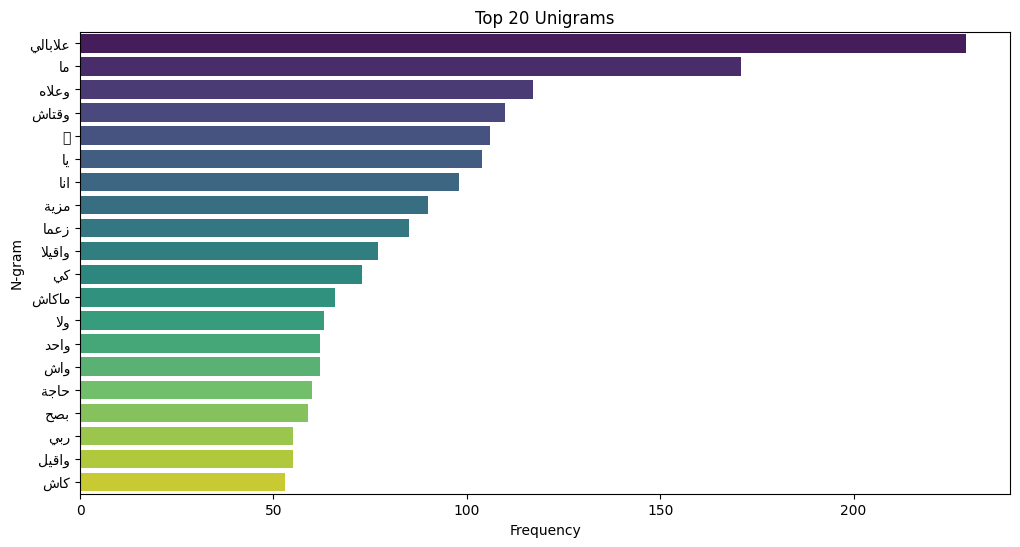

In [25]:
def plot_top_n_grams(ngram_counts, n, title):
    top_n = ngram_counts.most_common(n)
    words, counts = zip(*top_n)
    plt.figure(figsize=(12, 6))
    reshaped_words = [arabic_reshaper.reshape(word) for word in words]
    bidi_words = [get_display(word) for word in reshaped_words]
    sns.barplot(x=list(counts), y=bidi_words, palette="viridis")
    plt.title(f"Top {n} {title}")
    plt.xlabel("Frequency")
    plt.ylabel("N-gram")
    plt.show()

plot_top_n_grams(unigram_counts, 20, "Unigrams")

## WordCloud

In [26]:
#Import Necessary Librairies
import matplotlib.pyplot as plt
from wordcloud import WordCloud

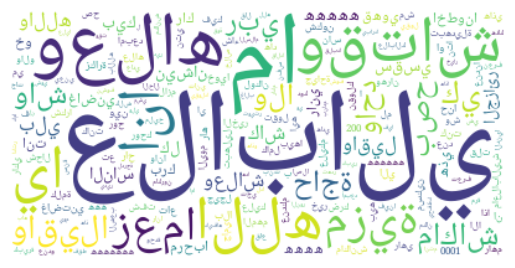

In [30]:
cloud_ar = WordCloud(font_path='NotoNaskhArabic-VariableFont_wght.ttf', background_color="white").generate_from_frequencies(unigram_counts)
plt.imshow(cloud_ar, interpolation='bilinear')
plt.axis('off')

plt.savefig("ary")
plt.show()